# MTR 3420 Atmospheric Dynamics  
# Data and Plotting Notebook 
# Justin Richling - 08/20/2018 

## This notebook will allow many learning opportunities: 
<br>
<li>Reading Data from NetCDF File</li><br>
  <li>Working with Multidimensional Arrays</li><br>
  <li>Creating Functions</li><br>
  <li>Running Calculations</li><br>
  <li>Using Working Notebook - chance to use HTML and Tex formatting</li><br>
  <li>Learning Python and common programming language terminology</li><br>
  <li>Algorithms - Learning how to think rationally</li><br>
  <li>Saving New Data to New NetCDF File</li><br>

## This notebook will also allow for several different plots:
<br>
<li>Plotting 1000 and 500mb Geopotential Heights with Surface Low</li><br>
  <li>500mb Geopotential Heights - Color-Filled Contours w/ Contours</li><br>
  <li>500mb u and v Components of Geostrophic Winds</li><br>
  <li>500mb Geostrophic Winds and Heights</li><br>
  <li>500mb Relative Vorticity and Heights</li><br>

<h3><center><font face="fantasy, serif" color=#233513 style="font-size:35px">-----------------------------//-----------------------------</font></center></h3>
<h1> <center>Storm Intro </center></h1>
<h3><center><font face="fantasy, serif" color=#233513 style="font-size:35px">-----------------------------//-----------------------------</font></center></h3>

# Snow Totals
<img src='http://mediaassets.scrippsnationalnews.com/photo/2016/02/01/GroundhogDayBlizzard-SnowfallTotals_1454342782744_31151996_ver1.0_900_675.jpg' height="600" width="600">

# Reflectivity
<img src='http://www.bouldercast.com/wp-content/uploads/2016/02/18Z-20160201_hrrrCGPsf_prec_radar.gif' height="600" width="600">

# Surface Map

<img src="http://www2.mmm.ucar.edu/imagearchive1/SatSfcComposite/20160202/sat_sfc_map_2016020207.gif" height="600" width="600">

![](1000and500mb.png)

# 500mb Vorticity
<img src="http://www2.mmm.ucar.edu/imagearchive1/ETA500mbAnalysis/vorticity/20160202/eta500_vrt_2016020208.gif" height="600" width="600">

<h1>In Python we can import external libraries that we can download which will help us in numerous ways</h1>

* One of the most useful aspects of Python is being able to import external libraries (once you have them downloaded) to help with such things like mathematical calcs, plotting, working with arrays and specific types of data files (NetCDF for example).<br>


* We can also use them for grabbing things from the internet or the operating system of our computer like command line operations.

In [ ]:
cd /home/username/Downloads/

In [3]:
# numpy is Python's math library and helps us with calculations. Trig functions, constants and 
# symbols are accessable.
import numpy as np

# xarray will allow us so many cool and useful features when working with multidimensional data arrays
import xarray as xr

# Matplotlib is Pyhton's plotting library and pyplot is where all our plotting be be coming from
import matplotlib.pyplot as plt

# This can allow us to Gaussian smooth the data if desired
import scipy.ndimage as ndimage

# It wouldn't be a bad idea to save our calulations in a new .nc file so we don't have to run calculations
# everytime we open our notebook.
import netCDF4
from netCDF4 import Dataset
from netCDF4 import Dataset as NetCDFFile

# Build our backgroud map and plotting control
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Possibly needed for plot stuff
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import patheffects

import Color_Bar 

# A very handy function to hide the cells from view so the students couldn't see my work but see the output
import Cell_Hide_Toggle 

# -------------------------------------------//------------------------------------------

# Now it's time to pull some data from our NetCDF file!
    
* What we will be doing time and time again is assigning data, numbers, strings, etc to <i>variables</i>. This allows us to keep accessing the data once the data file is closed. Most importantly it will allow us to be free to probe the information stored in the variable over and over again in our <i>for-loops</i>.


* Setting the file path as a variable <i>ds</i> for the data file. Find out where this file lives on your computer. We can use the command line or through finder windows on the desktop.


* Then calling NetCDFFile() will read all the data from the NetCDF file and we can print it out to examine what's going on.

In [30]:
ds = NetCDFFile('/home/username/Downloads/hgt.2016.nc')

In [58]:
# Let's make our own NetCDF file so we can keep track of our progress:
dataset = Dataset('/home/username/Desktop/Groundhogs_Day_Storm_Calcs.nc','w')
dataset.close()

### The newly saved data set can be probed by key words inherent to the file. We can find what the different variables are in the data set by calling the $keys()$ function of $ds$:

In [31]:
list(ds.variables.keys())

['level', 'lat', 'lon', 'time', 'hgt']

### To explore the data available in any of the variables we just call ds by the variable name. Remember that the quotes are strings, so we're searching the whole data set by a specific name and it will return all the values and metadata if it is an appropriate variable within the data set.

### Print the 'level' metadata

In [32]:
print(ds.variables['level'])

<class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    units: millibar
    actual_range: [1000.   10.]
    long_name: Level
    positive: down
    GRIB_id: 100
    GRIB_name: hPa
    axis: Z
unlimited dimensions: 
current shape = (17,)
filling on, default _FillValue of 9.969209968386869e+36 used



### List the pressure levels:

In [33]:
print(ds.variables['level'].units)
list(ds.variables['level'][:])

millibar


[1000.0,
 925.0,
 850.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 70.0,
 50.0,
 30.0,
 20.0,
 10.0]

### Print the 'lon' metadata

In [34]:
print(ds.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [  0.  357.5]
    standard_name: longitude
    axis: X
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used



### Remember the concpet of finding slices of data? Below we will try and access the 140th entry of the lon variable. Note: this is not the longitude itself, it will print out what longitude 140 is in a set of 144 lons:

In [35]:
print(ds.variables['lon'][140])

# actual_range:   [   0.   357.5]  
# means (0,2.5,...,355,357.5)

350.0


## We are going to grab all the values for each variable and assign them to a new arrays: Lat, Lon, Time, and Level:

In [36]:
Lat = ds.variables['lat'][:] # The .values command is fetching just the numerical data
Lon = ds.variables['lon'][:]
Time = ds.variables['time'][:]
Level = ds.variables['level'][:]

print("Data type of our new arrays: ",type(Lon))
print("Shape of Lat array: ",Lat.shape[0])
print("Shape of Lon array: ",Lon.shape[0])
print("Shape of Time array: ",Time.shape[0])
print("Shape of Level array: ",Level.shape[0])
print("Number of dimensions for Level array: "+str(len(Level.shape))+", meaning 1 dimension of length 17")

Data type of our new arrays:  <class 'numpy.ma.core.MaskedArray'>
Shape of Lat array:  73
Shape of Lon array:  144
Shape of Time array:  1464
Shape of Level array:  17
Number of dimensions for Level array: 1, meaning 1 dimension of length 17


# -------------------------------------------//------------------------------------------

In [ ]:
# Lets find the index number in Level array for say 500mb
mylevel = input("Which mb level: ")
mylev_index = np.where(Level == mylevel)[0][0]
print "Pressure level index of input: ",mylev_index

### Now we need to find which index number Denver's lat and lon are knowing that Denver is approximately 40 N and -105 W or 255 E.


### We can use the indexing to find Denver's lat and lon in the same way we did before with the pressure level: 

In [ ]:
mylat = input("Which latitude? (-90 to 90) ")
Denlat_index = np.where(Lat == mylat)[0][0]
print "Index number for Denver lat: ",Denlat_index,"\n" # The \n just means print new line

mylon = input("Which latitude? (0 to 357.5) ") # Think about what is the range of the lons in this data set?
Denlon_index = np.where(Lon == mylon)[0][0]
print "Index number for Denver lon: ",Denlon_index

### So Lat[20] = 40 deg north = Denver's Lat
    
### And Lon[102] = 255 deg east = Denver's Lon.

# -------------------------------------------//------------------------------------------

## Finally we want to know the index number for Feb. 2nd, 12:00Z is in the $Time$ array:

In [ ]:
january=31*4 #31 days in January, multiplied by 4 for 00, 06, 12, and 18Z each day
groundhog=4+3 #4 time steps on the 1st plus 0 z on the 2nd, 6 z on the 2nd, 12 z on the second 
mytime_index=january+groundhog-1 # Reason for the minus one??
print("Day of year index number:",mytime_index,"\n")

# mytime is the variable for the index number.

In [37]:
# Uncomment these if you just want to assign to variables and move on quickly...

Denlat_index = 20
Denlon_index = 102
mytime_index = 130
mylev_index = 5

### Now we can populate a 4d array of time, level, lat, and lon. Each entry in the new 4d array will have a height value in meters:

* Give this a minute as it is doing some heavy lifting populating all the indicies

In [11]:
%%time
# hgt(time, level, lat, lon)
height = ds.variables['hgt'][:,:,:,:]

# for the CONUS we need the index range for lats (12:32) and lons (88:122)
CONUS_height = ds.variables['hgt'][:,:,12:32,88:122]

print("Shape of the full height array: ",height.shape)
print(type(height[0,0,0,0]))

Shape of the full height array:  (1464, 17, 73, 144)
<class 'numpy.float32'>
CPU times: user 26.7 s, sys: 7.71 s, total: 34.4 s
Wall time: 1min 22s


### One cool feature of accessing metadata is getting metadata to save as variables too. Here we are pulling the description of the name of the variable:

In [12]:
# height array stored all the actual values of ds["hgt"], but not the metadata like description (.var_descr)

hgt_descr = str(ds.variables['hgt'].var_desc)
print("What 'hgt' variable is: ",hgt_descr)

What 'hgt' variable is:  Geopotential height


In [38]:
print(ds.variables["time"])

# fill in times.
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
dates = [datetime(2016,1,1)+n*timedelta(hours=6) for n in range(Time.shape[0])]

mydate = dates[mytime_index]
mydate

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    delta_t: 0000-00-00 06:00:00
    standard_name: time
    axis: T
    units: hours since 1800-01-01 00:00:0.0
    actual_range: [1893408. 1902186.]
unlimited dimensions: time
current shape = (1464,)
filling on, default _FillValue of 9.969209968386869e+36 used



datetime.datetime(2016, 2, 2, 12, 0)

## Since we've loaded all our data we can close the file so it's not running in the background:

In [42]:
ds.close()

# Let's play with the CartoPy Mapping Library

In [18]:
# Set pur lat/lon box for plotting 
#extent = [-125,-70,20,50]
extent = [-125,-70,25,48]

# Set projection of data
datacrs = ccrs.PlateCarree()

# Set projection of map
plotcrs = ccrs.LambertConformal(central_latitude=[20, 60], central_longitude=-100)

# Add Map Features
country_borders = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_0_countries',scale='50m', facecolor='none')

state_boundaries = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

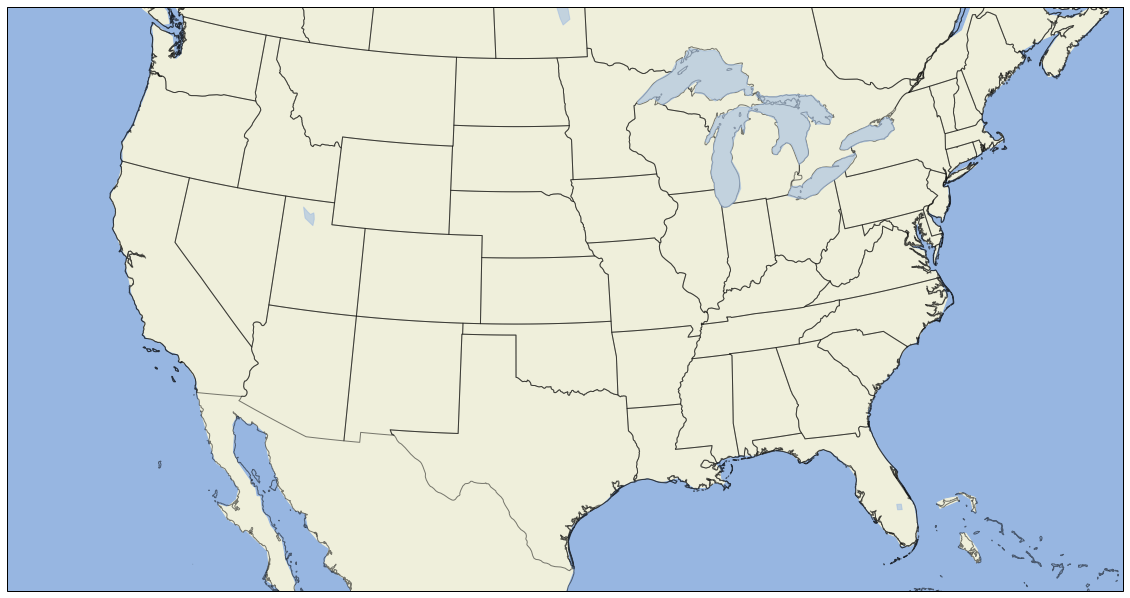

In [19]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)

# plot only the CONUS from the lat/lon extent
ax.set_extent(extent, datacrs)

plt.show()

## Now we can plot Denver's location with a star

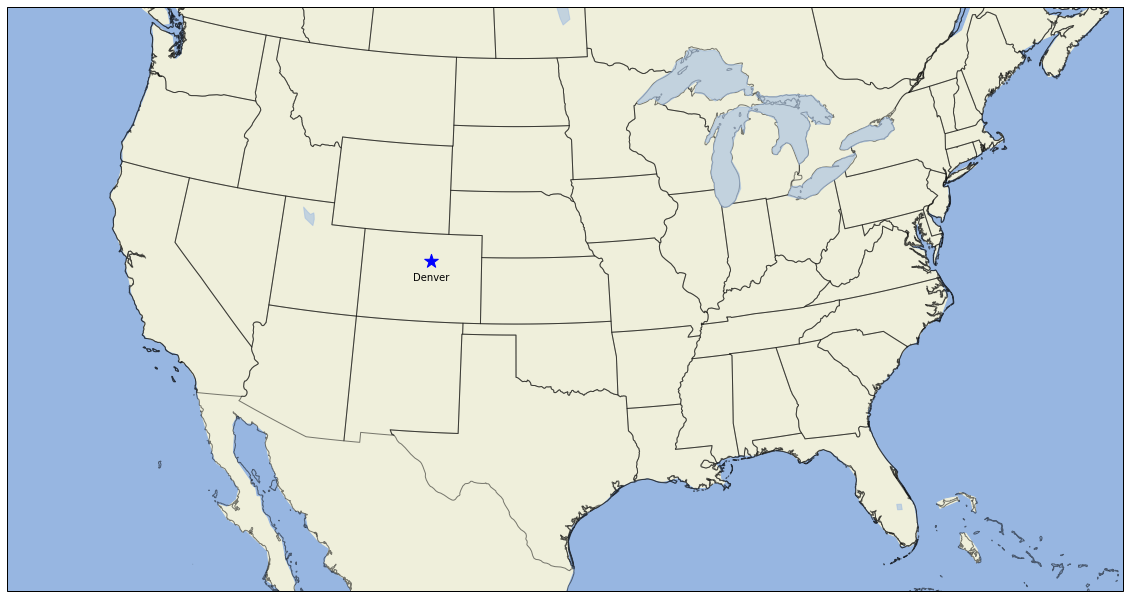

In [20]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
    # draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# Labeling Denver with a star
ax.scatter(-104.9903, 39.7392, marker='*', c="blue",transform=datacrs,s=205)
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform)

plt.show()
Cell_Hide_Toggle.hide_toggle()

# OK, now that we can plot a map, let's pull some of the geopotential heights:

In [39]:
#CONUS_height
hgt129_Surf=CONUS_height[mytime_index-1,0,:,:]
hgt129_500mb=CONUS_height[mytime_index-1,5,:,:]

hgt130_Surf=CONUS_height[mytime_index,0,:,:]
hgt130_500mb=CONUS_height[mytime_index,5,:,:]

hgt131_Surf=CONUS_height[mytime_index+1,0,:,:]
hgt131_500mb=CONUS_height[mytime_index+1,5,:,:]

# Set the countour levels for both heights
hgt129_Surf_levels = np.arange(-20,400,40) 
hgt129_500mb_levels = np.arange(hgt129_500mb.min(),hgt129_500mb.max()+53,60)

hgt130_Surf_levels = np.arange(-20,400,40) 
hgt130_500mb_levels = np.arange(hgt130_500mb.min(),hgt130_500mb.max()+53,60) 

hgt131_Surf_levels = np.arange(-20,400,40) 
hgt131_500mb_levels = np.arange(hgt131_500mb.min(),hgt131_500mb.max()+53,60)

## If you want to smooth the data with a Gaussian filter:

## Let's also fill our calculation .nc file wiht lats, lons, hights, and times

In [59]:
%%time

datafile2 = NetCDFFile('/home/username/Desktop/Groundhogs_Day_Storm_Calcs.nc','a')

level = datafile2.createDimension('level', len(Level))
lat = datafile2.createDimension('lat', len(Lat))
lon = datafile2.createDimension('lon', len(Lon))
date = datafile2.createDimension('date', len(Time))

levels = datafile2.createVariable('level', np.int32, ('level',))
latitudes = datafile2.createVariable('latitude', np.float32,('lat',))
longitudes = datafile2.createVariable('longitude', np.float32,('lon',))
datez = datafile2.createVariable('dates', np.float32, ('date',))
# Create the 4-d array for geopotential heights
hgts = datafile2.createVariable('hgt', np.float32,('date','level','lat','lon'))


CPU times: user 1.8 ms, sys: 1.26 ms, total: 3.05 ms
Wall time: 2.14 ms


In [60]:
datafile2.close()

In [61]:
list(datafile2.variables.keys())

['level', 'latitude', 'longitude', 'dates', 'hgt']

## Plot the 500mb Heights

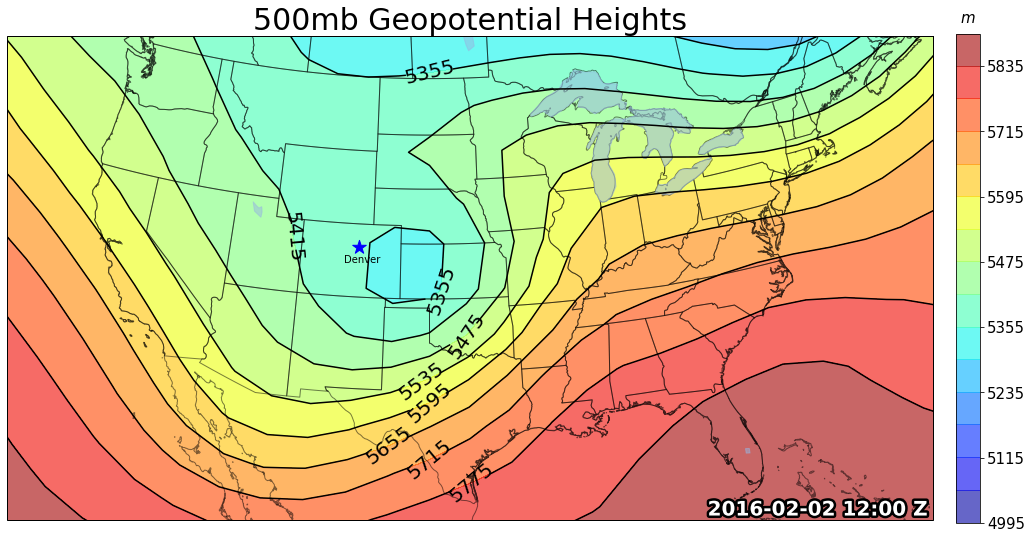

In [62]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# Plotting of the data here
hgt_contourfill=ax.contourf(Lon[88:122],Lat[12:32],hgt130_500mb,hgt130_500mb_levels,
                cmap=plt.cm.jet,transform=datacrs,alpha=0.6)
hgt_contour=ax.contour(Lon[88:122],Lat[12:32],hgt130_500mb,hgt130_500mb_levels,
                colors="k",transform=datacrs)

# Labeling the contours
plt.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='k')

# Let's set the colorbar and position
cb = plt.colorbar(hgt_contourfill,pad=0.02, shrink=0.45) # cax = cbaxes
cb.ax.tick_params(labelsize=15)
cb.ax.set_title('$m$', fontsize=15,horizontalalignment='center',y=1.01,x=.5)

# Labeling Denver with a star
transform = datacrs._as_mpl_transform(ax)
# xy=() is the displacemnt from the star itself
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform)
# plot the star at Denver's lon/lat
ax.scatter(-104.9903, 39.7392, marker='*', c="blue",transform=datacrs,s=205)

# Set the plot title
plt.title('500mb Geopotential Heights',fontsize=30)#loc="left"
#plt.title(mydate,fontsize=20,loc='right')

text_time = ax.text(.995, 0.01, 
        str(mydate)[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[130])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_Height_Contour_"+file_date+".png",bbox_inches='tight')

plt.show()
Cell_Hide_Toggle.hide_toggle()

# -------------------------------------------//------------------------------------------

# Functions!

## Now time to define a fucntion so we can call it many times and get all the values we need like a programmable calculator. PGF will be the name of the function and and the arguments in the parenthesis will be the variables it needs to run the calculation.

### $PGF = -(\frac{\partial \Phi_{i}}{\partial x} \hat{i} + \frac{\partial \Phi_{j}}{\partial y} \hat{j} )= -(\frac{\Delta\Phi_{lon}}{\Delta x} \hat{i} + \frac{\Delta\Phi_{lat}}{\Delta y} \hat{j} )$


### $PGF = -(\frac{\Phi_{east} - \Phi_{west}}{dx} \hat{i} + \frac{\Phi_{north} - \Phi_{south}}{dy} \hat{j} ) = -g(\frac{Z_{east} - Z_{west}}{dx} \hat{i} + \frac{Z_{north} - Z_{south}}{dy} \hat{j} )$

### $\left\lvert{PGF}\right\rvert = \sqrt{PGF_{x}^{2}+PGF_{y}^{2}}$

In [47]:
def PGF(time,level,height_east,height_west,height_north,height_south,dx,dy):
    pgfx = -9.8*((height_east-height_west)/(dx*2))
    pgfy = -9.8*((height_north-height_south)/(dy*2))
    pgf = np.sqrt((pgfx**2)+(pgfy**2))
    return float(pgfx), float(pgfy), float(pgf)

### Since we know the beam angle of the instrument and the lat and lon values, the dx and dy can be calcluated knowing that 2.5 deg of latitude is 278km and 2.5 deg of longitude is 213km:

In [48]:
dx = 213000
dy = 278000

### Now we can calculate the geopotential heights at and around Denver. Taking these heights will allow us to calculate the PGF at Denver

In [49]:
height_Denver = height[mytime_index,5,Denlat_index,Denlon_index]
print("Denver's height:",height_Denver,"m")

# The reason why the northern height is Denlat-1 instead of +1 is because how the lat data was read in?
height_north = height[mytime_index,5,Denlat_index-1,Denlon_index]
print("Height north:",height_north,"m")

height_south = height[mytime_index,5,Denlat_index+1,Denlon_index]
print("Height south:",height_south,"m")

height_east = height[mytime_index,5,Denlat_index,Denlon_index+1]
print("Height east:",height_east,"m")

height_west = height[mytime_index,5,Denlat_index,Denlon_index-1]
print("Height west:",height_west,"m")


Denver's height: 5362.0 m
Height north: 5390.0 m
Height south: 5362.0 m
Height east: 5339.0 m
Height west: 5392.0 m


### The variables in the PGF function returns 3 values, so we can set 3 variables when calling the PGF function:

In [50]:
pgfx,pgfy,pgf = PGF(mytime_index,mylev_index,height_east,height_west,height_north,height_south,dx,dy)

### We can print it out a little neater in scientific notation:

* (%.3e means 3 decimal places in 'e' or scientific notation)

In [51]:
print('PGFx at Denver:','%.3e' % pgfx)
print('PGFy at Denver:','%.3e' % pgfy)
print('PGF resultant:','%.3e' % pgf)

PGFx at Denver: 1.219e-03
PGFy at Denver: -4.935e-04
PGF resultant: 1.315e-03


### We should also calculate the angle of the resultant vector:

* (Note: numpy inverse trig functions are given in radians!)</font></h2>

In [52]:
angle = np.arccos(pgfx/pgf)*(180/np.pi)
# We can round the decimal to two places:
angle = np.around(angle,2)
print(angle,"degrees from x-axis")

22.04 degrees from x-axis


# -------------------------------------------//------------------------------------------

## End of Day 1 Data, I'm Proud of You!

# -------------------------------------------//------------------------------------------

# Day 2 Data

## We can also define another function for the Coriolis factor CorFac: 

## $f = 2\Omega sin{\phi} \hspace{10 mm} \Omega=7.292e^{-5}s^{-1}$

In [53]:
# We will need to pass the latitude from the Lat array to get the value!

def CorFac(mylat_index):
    cof = 2*7.292E-5*np.sin(Lat[mylat_index]*np.pi/180)
    return float(cof)

In [54]:
f = CorFac(Denlat_index)
print('Coriolis factor over Denver: ',f)
print('Coriolis factor over Denver: %.3e' % f)

Coriolis factor over Denver:  9.374414499668488e-05
Coriolis factor over Denver: 9.374e-05


## How would we want to scale this up to collect the Coriolis factor for all latitudes?

In [55]:
# Initate an empty 1d array to populate with Coriolis factors for each lat
#COR = xr.DataArray(np.zeros((73)),dims=['x'],coords={'x': Lat})
COR = np.zeros((73))

for i in range(0,73):
    COR[i]=CorFac(i)
        
print("done.")

done.


## We can also add the Coriolis Factor to our calcuations .nc file too

In [64]:
datafile2 = NetCDFFile('/home/username/Desktop/Groundhogs_Day_Storm_Calcs.nc','a')

corfac = datafile2.createDimension('Cor_factor', len(Lat))

Cor_factor = datafile2.createVariable('corfac', np.int32, ('lat',))
Cor_factor[:] = COR

datafile2.close()

In [65]:
list(datafile2.variables.keys())

['level', 'latitude', 'longitude', 'dates', 'hgt', 'corfac']

# -------------------------------------------//------------------------------------------

## End of Day 2 Data, No sweat

# -------------------------------------------//------------------------------------------

# Day 3 Data

## With the geopotential height differences and the Coriolis factor, the geostrophic winds can be calculated.

## $\vec{V_{g}} = -\frac{1}{f}(\frac{\partial \Phi_{j}}{\partial y} \hat{i} - \frac{\partial \Phi_{i}}{\partial x} \hat{j} )$

## Let's break the total horizontal geostrophic wind vector into it's zonal and meridonal components:

## $\vec{u_{g}} = -\frac{1}{f}(\frac{\partial \Phi_{j}}{\partial y})\hspace{.1cm}\hat{i}= -\frac{g}{f}(\frac{\partial Z_{j}}{\partial y})\hspace{.1cm}\hat{i}$

In [66]:
def uGeoWind(level,time,lat,lon,dy):
    ug = (-9.8/CorFac(lat))*\
          ((height[time][level][lat-1][lon]-height[time][level][lat+1][lon])/(dy*2))   

    return ug

Cell_Hide_Toggle.hide_toggle()

## $\vec{v_{g}} = \frac{1}{f}(\frac{\partial \Phi_{i}}{\partial x})\hspace{.1cm}\hat{j} = \frac{g}{f}(\frac{\partial Z_{i}}{\partial x})\hspace{.1cm}\hat{j}$

In [67]:
def vGeoWind(level,time,lat,lon,dx):
    vg = (9.8/CorFac(lat))*\
          ((height[time][level][lat][lon+1]-height[time][level][lat][lon-1])/(dx*2))   
    
    return vg
Cell_Hide_Toggle.hide_toggle()

## $\left\lvert{V_{g}}\right\rvert= \sqrt{u_{g}^{2}+v_{g}^{2}}$

### We'll define another function called GeoWind

In [68]:
def GeoWind(level,time,lat,lon,dx,dy):

    ug = uGeoWind(level,time,lat,lon,dy)
    vg = vGeoWind(level,time,lat,lon,dx)
    
    return np.sqrt((ug**2)+(vg**2))

Cell_Hide_Toggle.hide_toggle()

In [69]:
u = uGeoWind(mylev_index,mytime_index,Denlat_index,Denlon_index,dy)
print('zonal compnent: %.3f' % u)

zonal compnent: -5.265


In [70]:
v = vGeoWind(mylev_index,mytime_index,Denlat_index,Denlon_index,dx)
print('meridional compnent: %.3f' % v)

U = GeoWind(mylev_index,mytime_index,Denlat_index,Denlon_index,dx,dy)
print('total geostrophic wind: %.3f' % U)

Cell_Hide_Toggle.hide_toggle()

meridional compnent: -13.006
total geostrophic wind: 14.031


## We can find the rose angle of the Geostrophic wind

In [71]:
angle = np.arccos(u/U)*(180/np.pi)
# We can round the decimal to two places:
angle = np.around(angle,2)
print(angle,"degrees from x-axis")

Cell_Hide_Toggle.hide_toggle()

112.04 degrees from x-axis


# -------------------------------------------//------------------------------------------

# -------------------------------------------//------------------------------------------

# Creating new arrays for our calculations
    
## Don't focus on the how so much as to what you are getting in the end. We are making a 2d array named WindsFull_130_500mb with coordiantes of lat and lon only. This array is focused on time 130 and level 500mb.

## In the nested for-loop we will need to loop over all the lats and lons seperately so we will have a wind value for every lat/lon pair.

In [72]:
%%time

Winds_130_500mb = np.zeros((73, 144))
uWinds_130_500mb = np.zeros((73, 144))
vWinds_130_500mb = np.zeros((73, 144))
print(Winds_130_500mb.shape)

# We need to go from the second entry to the second to last entry, why?
for i in range(1,72):
    for j in range(1,143):
            try:
                Winds_130_500mb[i,j]=GeoWind(mylev_index,mytime_index,i,j,dx,dy) # What arguments does GeoWind take?
                uWinds_130_500mb[i,j]=uGeoWind(mylev_index,mytime_index,i,j,dy)
                vWinds_130_500mb[i,j]=vGeoWind(mylev_index,mytime_index,i,j,dx)
            except ZeroDivisionError:
                normalized_score = 0
                
print("done.")

(73, 144)
done.
CPU times: user 3.82 s, sys: 16.1 ms, total: 3.83 s
Wall time: 3.87 s


In [73]:
print("Winds min value:",Winds_130_500mb.min())
print('Winds max value: %.3f' % Winds_130_500mb.max())

Winds min value: 0.0
Winds max value: 61.452


## Set up arrays for the days before and after

In [74]:
%%time

Winds_129_500mb = np.zeros((73, 144))
uWinds_129_500mb = np.zeros((73, 144))
vWinds_129_500mb = np.zeros((73, 144))

Winds_131_500mb = np.zeros((73, 144))
uWinds_131_500mb = np.zeros((73, 144))
vWinds_131_500mb = np.zeros((73, 144))
print(Winds_131_500mb.shape)

for i in range(1,72):
    for j in range(1,143):
        try:
            Winds_129_500mb [i,j]=GeoWind(mylev_index,mytime_index,i,j,dx,dy)
        except ZeroDivisionError:
                normalized_score = Winds_129_500mb[i-1,j-1] 
                
for i in range(1,72):
    for j in range(1,143):
        try:
            Winds_131_500mb [i,j]=GeoWind(mylev_index,mytime_index,i,j,dx,dy)
        except ZeroDivisionError:
                normalized_score = Winds_131_500mb[i-1,j-1] 
print("done.")

(73, 144)
done.
CPU times: user 3.76 s, sys: 11.6 ms, total: 3.77 s
Wall time: 3.78 s


## Let's update our calculations .nc file with the winds

In [75]:
datafile2 = NetCDFFile('/home/username/Desktop/Groundhogs_Day_Storm_Calcs.nc','a')

# 2-d arrays at days 129, 130, and 131 and 500mb only
uwinds_130_500 = datafile2.createVariable('uwinds_130_500', np.float32,('lat','lon',))
vwinds_130_500 = datafile2.createVariable('vwinds_130_500', np.float32,('lat','lon',))

winds_129_500 = datafile2.createVariable('winds_129_500', np.float32,('lat','lon',))
winds_130_500 = datafile2.createVariable('winds_130_500', np.float32,('lat','lon',))
winds_131_500 = datafile2.createVariable('winds_131_500', np.float32,('lat','lon',))

uwinds_130_500[:] = uWinds_130_500mb
vwinds_130_500[:] = vWinds_130_500mb

winds_129_500[:] = Winds_129_500mb
winds_130_500[:] = Winds_130_500mb
winds_131_500[:] = Winds_131_500mb

datafile2.close()

In [76]:
list(datafile2.variables.keys())

['level',
 'latitude',
 'longitude',
 'dates',
 'hgt',
 'corfac',
 'uwinds_130_500',
 'vwinds_130_500',
 'winds_129_500',
 'winds_130_500',
 'winds_131_500']

## In case we wanted to fill the geostrophic winds at all levels for this day

In [ ]:
%%time

Winds_130 = np.zeros((73, 144, 17))
print(Winds_130.shape)

for i in range(1,72):
    for j in range(1,143):
        for k in range(0,17):
            try:
                Winds_130[i,j,k]=GeoWind(k,mytime_index,i,j,dx,dy)
            except ZeroDivisionError:
                normalized_score = Winds_130[i-1,j-1,k] 
print("done.")

# Let's plot the u-component of the Winds

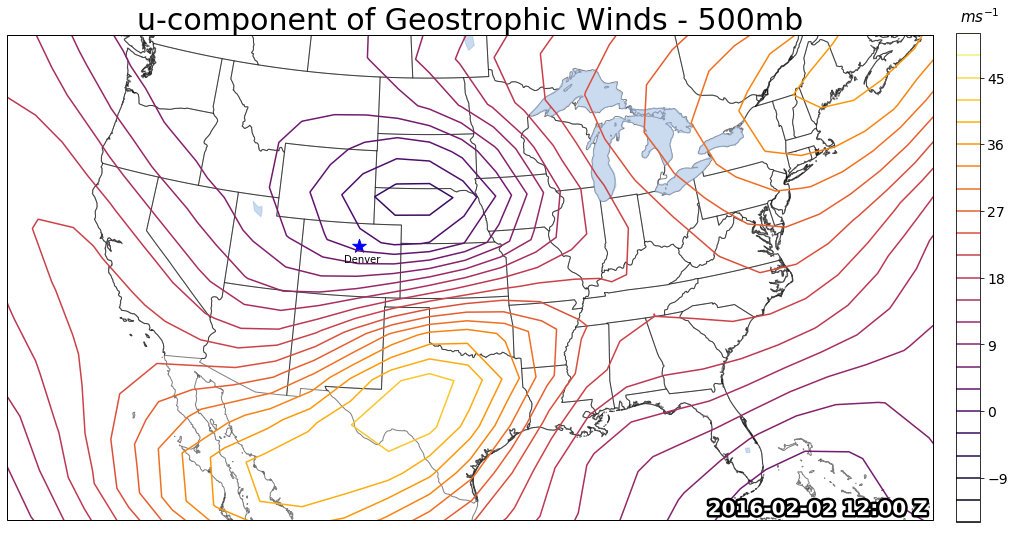

In [78]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
wind_levels = np.arange(int(uWinds_130_500mb[12:32,88:122].min()),
        int(uWinds_130_500mb[12:32,88:122].max()),3)

# Gaussian Filter to smooth the data and make it a little neater 
wind_smooth = ndimage.gaussian_filter(uWinds_130_500mb[12:32,88:122], sigma=1, order=0)

# Plotting of the data here
wind_contour = ax.contour(Lon[88:122], Lat[12:32],wind_smooth,levels=wind_levels,
        cmap=plt.cm.inferno,transform=datacrs)

# Let's set the colorbar and position
cb = plt.colorbar(wind_contour,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)

cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$ms^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

# Labeling the contours
#ax.clabel(wind_smooth.item, inline=True, fmt='%1i',fontsize=20,colors='k')

# Labeling Denver with a star
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform)
ax.scatter(-104.9903, 39.7392, marker='*', c="blue",transform=datacrs,s=205)

# Set the plot title
plt.title('u-component of Geostrophic Winds - 500mb',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(mydate)[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[130])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_uWinds_"+file_date+".png",bbox_inches='tight')

plt.show()
Cell_Hide_Toggle.hide_toggle()

# Now let's plot the v-component of the Winds

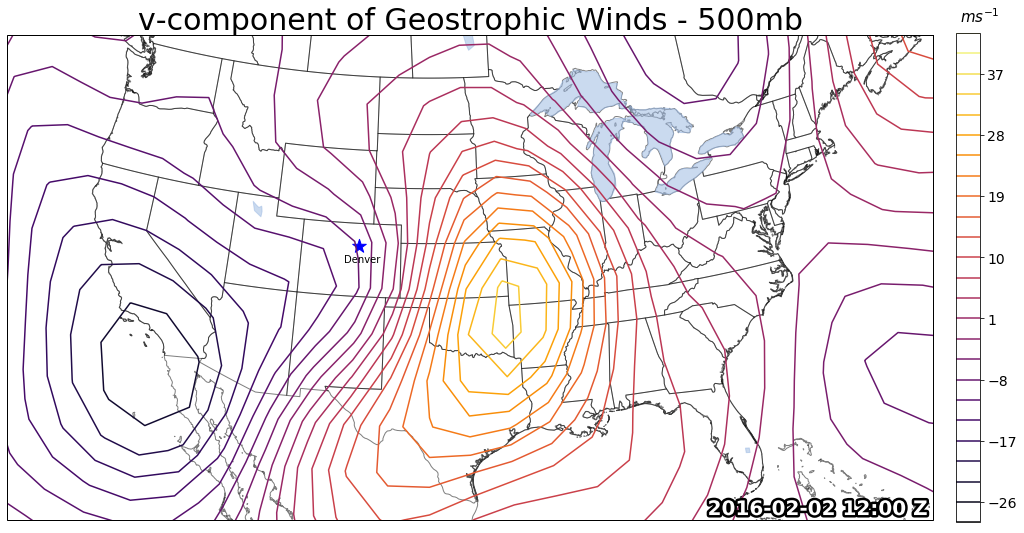

In [79]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
wind_levels = np.arange(int(vWinds_130_500mb[12:32,88:122].min()),
            int(vWinds_130_500mb[12:32,88:122].max()),3)

# Gaussian Filter to smooth the data and make it a little neater 
wind_smooth = ndimage.gaussian_filter(vWinds_130_500mb[12:32,88:122], sigma=1, order=0)

# Plotting of the data here
wind_contour = ax.contour(Lon[88:122], Lat[12:32],wind_smooth,levels=wind_levels,
            cmap=plt.cm.inferno,transform=datacrs)

# Let's set the colorbar and position
cb = plt.colorbar(wind_contour,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$ms^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

# Labeling the contours
#ax.clabel(wind_smooth.item, inline=True, fmt='%1i',fontsize=20,colors='k')

# Labeling Denver with a star
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform)
ax.scatter(-104.9903, 39.7392, marker='*', c="blue",transform=datacrs,s=205)

# Set the plot title
plt.title('v-component of Geostrophic Winds - 500mb',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(mydate)[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[130])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_vWinds_"+file_date+".png",bbox_inches='tight')

plt.show()
Cell_Hide_Toggle.hide_toggle()

# Finally, let's plot the full geostrophic wind

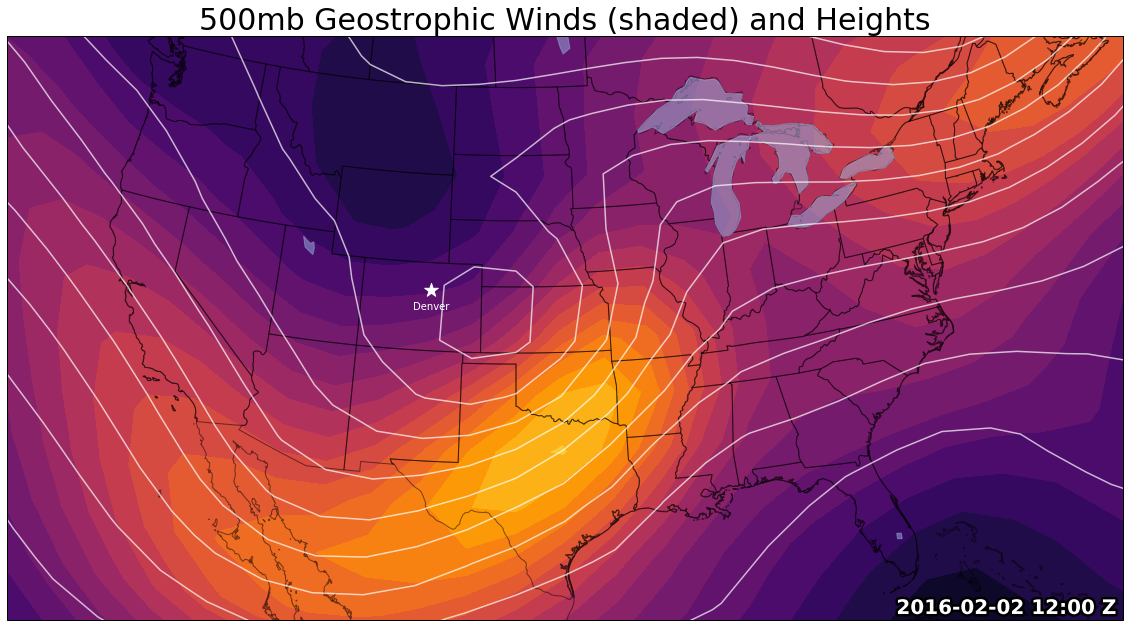

In [80]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
wind_levels = np.arange(int(Winds_130_500mb[12:32,88:122].min()),
            int(Winds_130_500mb[12:32,88:122].max()),3)

# Gaussian Filter to smooth the data and make it a little neater 
wind_smooth = ndimage.gaussian_filter(Winds_130_500mb[12:32,88:122], sigma=1, order=0)

# Plotting of the data here
wind_contourfill = ax.contourf(Lon[88:122], Lat[12:32],wind_smooth,wind_levels,
            cmap=plt.cm.inferno,transform=datacrs)

# If you want streamlines instead of contour fill...
#ax.streamplot(Lon[88:122], Lat[12:32],uWindsFull_130_500mb[12:32,88:122],vWindsFull_130_500mb[12:32,88:122],
#        cmap=plt.cm.inferno,transform=datacrs)

hgt_contour = ax.contour(Lon[88:122], Lat[12:32], hgt130_500mb,hgt130_500mb_levels,
            colors='w',transform=datacrs,alpha=0.7)

# Let's set the colorbar and position
#cb = plt.colorbar(wind_contourfill,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$ms^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

# Labeling the contours
#plt.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='w')

# Labeling Denver with a star
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform,color='w')
ax.scatter(-104.9903, 39.7392, marker='*', c="w",transform=datacrs,s=205)

# Set the plot title
plt.title('500mb Geostrophic Winds (shaded) and Heights',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(mydate)[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[130])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/jrichlin/Desktop/500mb_Winds_"+file_date+".png",bbox_inches='tight')

plt.show()
Cell_Hide_Toggle.hide_toggle()

# -------------------------------------------//------------------------------------------

## End of Day 3 Data, Hanging In there?

# -------------------------------------------//------------------------------------------

# Day 4 Data

## Now that we have the geostrophic winds, we can take a look at vorticity using the change in winds over distance.

## $\zeta = (\frac{\partial v_{geo}}{\partial x} - \frac{\partial u_{geo}}{\partial y} )$

### We can define a vorticity function, Vort

In [81]:
def Vort(level,time,lat,lon,dx,dy):    
    vort = ((vGeoWind(level,time,lat,lon+1,dx)-vGeoWind(level,time,lat,lon-1,dx))/(2*dx))-\
                            ((uGeoWind(level,time,lat-1,lon,dy)-uGeoWind(level,time,lat+1,lon,dy))/(2*dy))
    return vort

### We will do the same thing for the vorticity array as we did for the geostrophic winds:

In [82]:
%%time

Vort_130_500mb = np.zeros((73, 144))
print(Vort_130_500mb.shape)

# We have to change the range for our for-loops, before we could use 
for i in range(2,71):
    for j in range(2,141):
        try:
            Vort_130_500mb[i,j]=Vort(mylev_index,mytime_index,i,j,dx,dy)
        except ZeroDivisionError:
            normalized_score = 0
print("done.")

(73, 144)
done.
CPU times: user 3.83 s, sys: 27.9 ms, total: 3.85 s
Wall time: 3.94 s


In [83]:
print("Maximum vorticity value in array: %.3e" % Vort_130_500mb.min())
print("Minimum vorticity value in array: %.3e" % Vort_130_500mb.max())

Maximum vorticity value in array: -1.519e-04
Minimum vorticity value in array: 1.860e-04


## Set up arrays for the times before and after
* Again, give this some time to calculate and populate all the indicies for all the times

In [84]:
%%time

Vort_129_500mb = np.zeros((73, 144))
#Vort_130_500mb = np.zeros((73, 144))
Vort_131_500mb = np.zeros((73, 144))
print(Vort_129_500mb.shape)

for i in range(1,71):
    for j in range(1,142):
        try:
            Vort_129_500mb[i,j]=Vort(mylev_index,mytime_index-1,i,j,dx,dy)
            #VortFull_130[i,j,k]=Vort(mylev,130,i,j,dx,dy)
            Vort_131_500mb[i,j]=Vort(mylev_index,mytime_index+1,i,j,dx,dy)
        except ZeroDivisionError:
            normalized_score = Vort_129_500mb[i-1,j-1] 
print("done.")

(73, 144)
done.
CPU times: user 7.14 s, sys: 19.2 ms, total: 7.16 s
Wall time: 7.17 s


## One last variable to add to our calculations .nc file

In [85]:
datafile2 = NetCDFFile('/home/username/Desktop/Groundhogs_Day_Storm_Calcs.nc','a')

# 2-d arrays at days 129, 130, and 131 and 500mb only
vorts_129_500 = datafile2.createVariable('vorticity_129_500', np.float32,('lat','lon',))
vorts_130_500 = datafile2.createVariable('vorticity_130_500', np.float32,('lat','lon',))
vorts_131_500 = datafile2.createVariable('vorticity_131_500', np.float32,('lat','lon',))

vorts_129_500[:] = Vort_129_500mb
vorts_130_500[:] = Vort_130_500mb
vorts_131_500[:] = Vort_131_500mb

datafile2.close()

In [86]:
list(datafile2.variables.keys())

['level',
 'latitude',
 'longitude',
 'dates',
 'hgt',
 'corfac',
 'uwinds_130_500',
 'vwinds_130_500',
 'winds_129_500',
 'winds_130_500',
 'winds_131_500',
 'vorticity_129_500',
 'vorticity_130_500',
 'vorticity_131_500']

# Let's plot the absolute vorticity

In [87]:
colors=[(30,30,30),(50,50,50),(65,65,65),(80,80,80),(90,90,90),(100,100,100),(108,108,108),(114,114,114),
        (120,120,120),(130,130,130),(150,150,150),(180,180,180),(190,190,190),(200,200,200),(211,211,211),
        (220,220,220),(230,230,230),(244,244,244),(255, 255, 255),(255, 255, 255),(255, 255, 255),
        (230,250,230),(0, 100, 0),(50,200,50),(200,255,47),(255,255,0),(255,200,50),(255,150,80),
        (255,100,50),(255,0,0),(180,0,0),(140,0,0),(100,0,0),(150,10,0),(208,32,144),(150,32,144),
        (108,32,144),(0,0,100),(0,0,255),(0,150,150),(135,206,250)]

vort_cmap = Color_Bar.create_colormap(colors, bit=True)


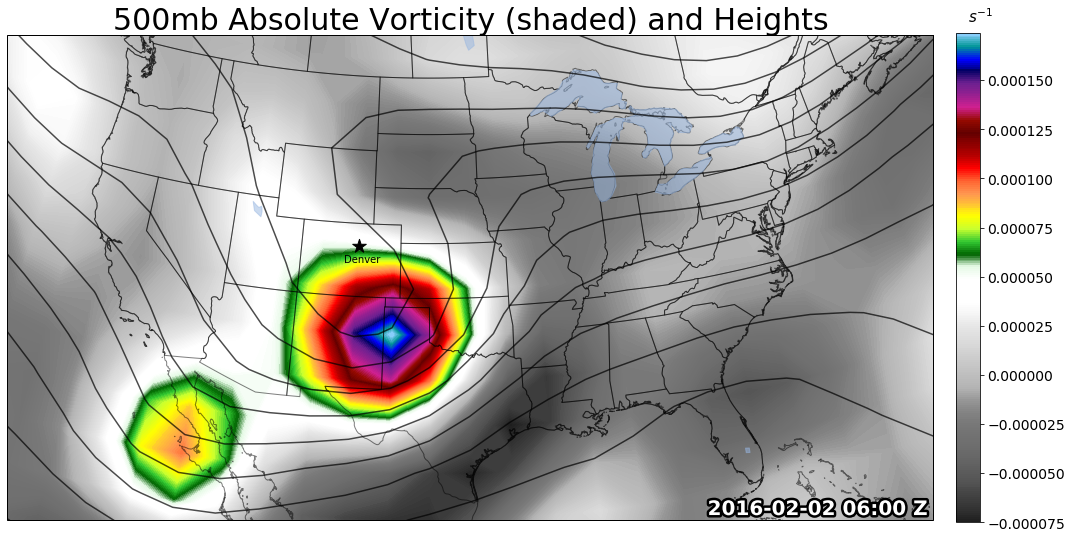

In [88]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
vort_levels = np.arange(float(Vort_129_500mb[12:32,88:122].min()),
            float(Vort_129_500mb[12:32,88:122].max()),0.000001)

# Gaussian Filter to smooth the data and make it a little neater 
vort_smooth = ndimage.gaussian_filter(Vort_129_500mb[12:32,88:122], sigma=1, order=0)

vort_contourfill = ax.contourf(Lon[88:122], Lat[12:32],Vort_129_500mb[12:32,88:122],vort_levels,
            transform=datacrs,cmap=vort_cmap)#,,vort_levels,cmap="BrBG", norm=norm

# Let's set the colorbar and position
cb = plt.colorbar(vort_contourfill,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$s^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

hgt_contour = ax.contour(Lon[88:122], Lat[12:32], hgt129_500mb,hgt129_500mb_levels,
            colors='k',transform=datacrs,alpha=0.7)# Labeling the contours
#ax.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='k')

# Labeling Denver with a star
ax.scatter(-104.9903, 39.7392, marker='*', c="k",transform=datacrs,s=205)
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform,color="k")

# Label plot title
plt.title('500mb Absolute Vorticity (shaded) and Heights',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(dates[129])[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)



# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[129])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_Vort_"+file_date+".png",bbox_inches='tight')

plt.show()
Cell_Hide_Toggle.hide_toggle()

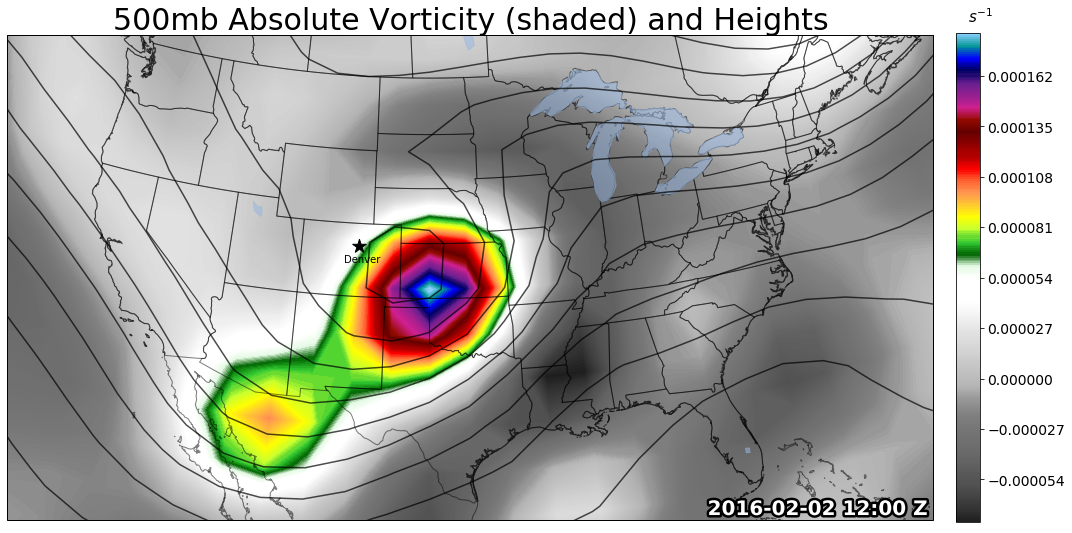

In [89]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
vort_levels = np.arange(float(Vort_130_500mb[12:32,88:122].min()),
            float(Vort_130_500mb[12:32,88:122].max()),0.000001)

# Gaussian Filter to smooth the data and make it a little neater 
vort_smooth = ndimage.gaussian_filter(Vort_130_500mb[12:32,88:122], sigma=1, order=0)

vort_contourfill = ax.contourf(Lon[88:122], Lat[12:32],Vort_130_500mb[12:32,88:122],vort_levels,
            transform=datacrs,cmap=vort_cmap)

# Let's set the colorbar and position
cb = plt.colorbar(vort_contourfill,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$s^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

hgt_contour = ax.contour(Lon[88:122], Lat[12:32], hgt130_500mb,hgt130_500mb_levels,
            colors='k',transform=datacrs,alpha=0.7)# Labeling the contours
#ax.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='k')

# Labeling Denver with a star
ax.scatter(-104.9903, 39.7392, marker='*', c="k",transform=datacrs,s=205)
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform,color="k")

# Label plot title
plt.title('500mb Absolute Vorticity (shaded) and Heights',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(dates[130])[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[130])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_Vort_"+file_date+".png",bbox_inches='tight')

plt.show()
Cell_Hide_Toggle.hide_toggle()

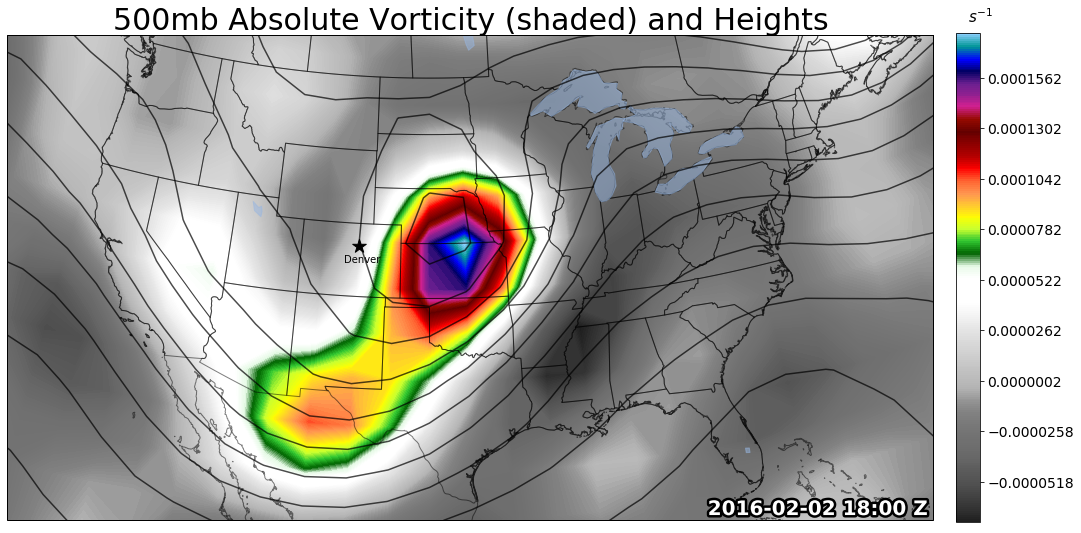

In [90]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
vort_levels = np.arange(float(Vort_131_500mb[12:32,88:122].min()),
            float(Vort_131_500mb[12:32,88:122].max()),0.000001)

# Gaussian Filter to smooth the data and make it a little neater 
vort_smooth = ndimage.gaussian_filter(Vort_130_500mb[12:32,88:122], sigma=1, order=0)


vort_contourfill = ax.contourf(Lon[88:122], Lat[12:32],Vort_131_500mb[12:32,88:122],vort_levels,
            transform=datacrs,cmap=vort_cmap)

# Let's set the colorbar and position
cb = plt.colorbar(vort_contourfill,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$s^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

hgt_contour = ax.contour(Lon[88:122], Lat[12:32], hgt131_500mb,hgt131_500mb_levels,
            colors='k',transform=datacrs,alpha=0.7)# Labeling the contours
#ax.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='k')

# Labeling Denver with a star
ax.scatter(-104.9903, 39.7392, marker='*', c="k",transform=datacrs,s=205)
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform,color="k")

# Label plot title
plt.title('500mb Absolute Vorticity (shaded) and Heights',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(dates[131])[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[131])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_Vort_"+file_date+".png",bbox_inches='tight')

plt.show()
Cell_Hide_Toggle.hide_toggle()

In [91]:
#('Winds max value: %.3e' % Vort_130_500mb.max())[-4:]
('Winds max value: %.3e' % Vort_130_500mb.max())[-4:]
#str(label '%.3e' % Vort_130_500mb.max()[:-4])

'e-04'

# -------------------------------------------//------------------------------------------

## End of Day 4 Data, All Done!

# -------------------------------------------//------------------------------------------
# -------------------------------------------//------------------------------------------

In [92]:
dataset2 = Dataset('/home/username/Desktop/Groundhogs_Day_Storm_Calcs.nc','r')

In [95]:
list(dataset2.variables.keys())

['level',
 'latitude',
 'longitude',
 'dates',
 'hgt',
 'corfac',
 'uwinds_130_500',
 'vwinds_130_500',
 'winds_129_500',
 'winds_130_500',
 'winds_131_500',
 'vorticity_129_500',
 'vorticity_130_500',
 'vorticity_131_500']

### We can fill the unmodified dates into a variable too if we want, and then convert after we re-read the data later

In [93]:
Date=[]
for i in range(len(Time)):
    date1 = str(Time[i])[0:10] # Remember we can take pieces of the string
    Date.append(date1)
    dates[i]=Date[i]

In [97]:
# for the CONUS we need the index range for lats (12:32) and lons (88:122)
CONUS_height_calc = dataset2.variables['hgt'][:,:,12:32,88:122]
hgt130_Surf_calc=CONUS_height[mytime_index,0,:,:]
hgt130_500mb_calc=CONUS_height[mytime_index,5,:,:]

hgt130_Surf_levels_calc = np.arange(0,400,4) 
hgt130_500mb_levels_calc = np.arange(float(hgt130_500mb_calc.min()),float(hgt130_500mb_calc.max())+53,60) 

In [98]:
# fill in times.
Times = dataset2.variables["dates"]
dates_calc = [datetime(2016,1,1)+n*timedelta(hours=6) for n in range(Times.shape[0])]
print(len(dates))
mydate = dates_calc[mytime_index]
mydate

1464


datetime.datetime(2016, 2, 2, 12, 0)

In [99]:
Vort_130_500mb_calc = dataset2.variables['vorticity_130_500'][:]
print(len(Vort_130_500mb_calc))

73


### We can try and plot the data to make sure we generated the netCDF file correctly:

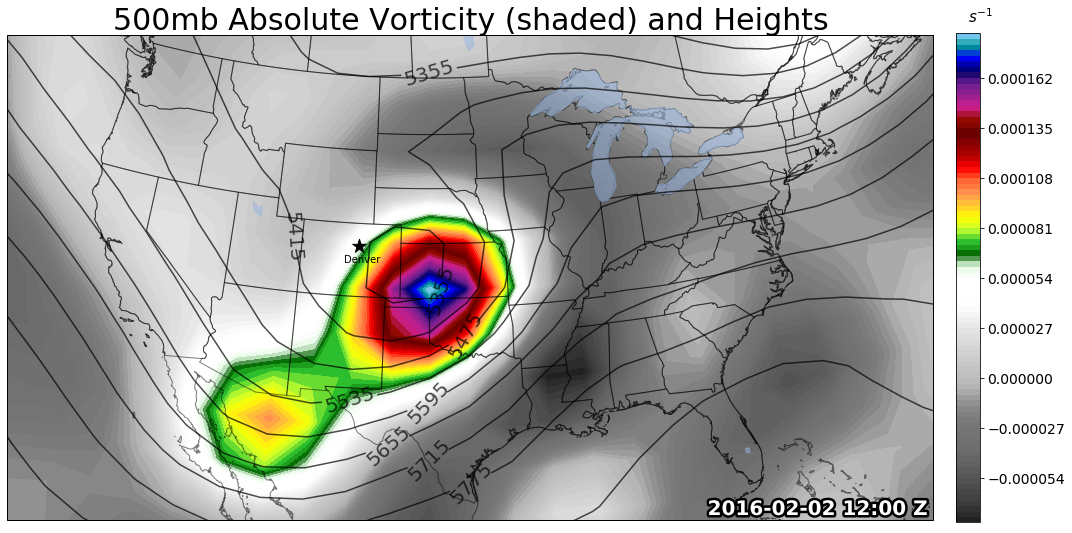

In [100]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
vort_levels = np.arange(float(Vort_130_500mb_calc[12:32,88:122].min()),
            float(Vort_130_500mb_calc[12:32,88:122].max()),0.00001)

# Gaussian Filter to smooth the data and make it a little neater 
vort_smooth = ndimage.gaussian_filter(Vort_130_500mb_calc[12:32,88:122], sigma=1, order=0)


vort_contourfill = ax.contourf(Lon[88:122], Lat[12:32],Vort_130_500mb_calc[12:32,88:122],100,
            transform=datacrs,cmap=vort_cmap)

# Let's set the colorbar and position
cb = plt.colorbar(vort_contourfill,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$s^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

hgt_contour = ax.contour(Lon[88:122], Lat[12:32], hgt130_500mb_calc,hgt130_500mb_levels_calc,
            colors='k',transform=datacrs,alpha=0.7)# Labeling the contours
ax.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='k')

# Labeling Denver with a star
ax.scatter(-104.9903, 39.7392, marker='*', c="k",transform=datacrs,s=205)
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform,color="k")

# Label plot title
plt.title('500mb Absolute Vorticity (shaded) and Heights',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(dates_calc[mytime_index])[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[130])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_Vort_"+file_date+".png",bbox_inches='tight')

plt.show()
Cell_Hide_Toggle.hide_toggle()

# -------------------------------------------//------------------------------------------
# -------------------------------------------//------------------------------------------

## If we want to capture all the vorticity data at 500mb for the whole year
* Please be patient with this one...

In [ ]:
%%time

Vort_500mb = np.zeros((20, 34,30*4))
print(Vort_500mb.shape)
#[:,:,12:32,88:122]
for i in range(0,20):
    for j in range(0,34):
        for k in range(0,120):
            try:
                Vort_500mb[i,j,k]=Vort(mylev_index,k+124,i+12,j+88,dx,dy)
            
            except ZeroDivisionError:
                normalized_score = Vort_500mb[i-1,j-1,k] 
print("done.")

In [ ]:
Vort_500mb.shape

In [ ]:
Vort_US_500mb = Vort_500mb